My first classifier will use chap 2 of the FastAI course to classifier between three different objects,
plates, cups, and bowls.

Fun Fact this grouping is called crockery

First we will import fastai

In [20]:
!pip install fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

We need an azure search bing images key

In [21]:
key = os.environ.get('AZURE_SEARCH_KEY', 'YOUR KEY HERE')

Then we will create categories, paths, and download images

In [22]:
crockery_types = ['plate', 'cup', 'bowl']
path = Path('crockery')

# If you want to delete crockery
# shutil.rmtree('crockery')

if not path.exists():
    path.mkdir()
    for crockery in crockery_types:
        dest = (path/crockery)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, crockery)
        download_images(dest, urls=results.attrgot('contentUrl'))    

In [23]:
fns = get_image_files(path)
failed = verify_images(fns)
failed

(#2) [Path('crockery/bowl/00000043.jpg'),Path('crockery/plate/00000059.jpg')]

In [24]:
failed.map(Path.unlink);

Next we will create the data block

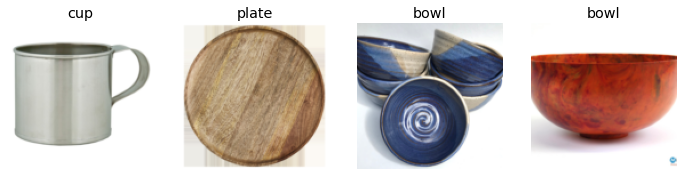

In [25]:
crockery = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2,seed=34),
    get_y=parent_label,
    item_tfms=Resize(128))

dls = crockery.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [26]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.593076,0.699058,0.244186,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.644708,0.371119,0.151163,00:13
1,0.456751,0.247338,0.093023,00:12
2,0.332144,0.188232,0.069767,00:13
3,0.257514,0.185882,0.058140,00:13


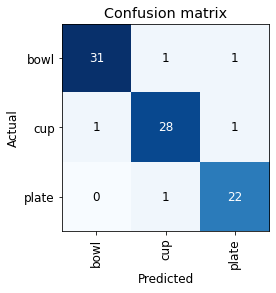

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

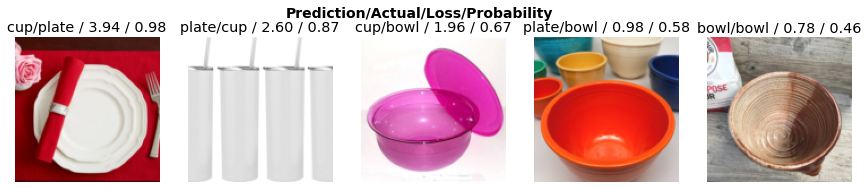

In [28]:
interp.plot_top_losses(5, nrows=1)